cmaptools
=========
A convenient package to read GMT style cpt-files to matplotlib cmaps and
mimic the dynamic scaling around a hinge point. See [GMT: Master (dynamic) CPTs](http://gmt.soest.hawaii.edu/doc/latest/GMT_Docs.html#master-dynamic-cpts) for more details...

Some colormaps are designed with a color discontinuity to emphasize the boundary between two different domains, for instance between bathymetry and topography. When scaling a dynamic colormap, the lower (`v < hinge`) and upper (`v > hinge`) parts are scaled separately. Here is an example:

In [1]:
import matplotlib.pyplot as plt

from cmaptools import readcpt, joincmap, DynamicColormap

## Generic Mapping Tools style cpt files
A GMT color palette table (cpt) file is read and converted to a matplotlib colormap instance with `readcpt`. A `DynamicColormap` instance is returned if the colormap is diverging (`vmin < hinge < vmax`) or a `LinearSegmentedColormap` instance if the colormap is sequential.

globe <class 'cmaptools.DynamicColormap'>


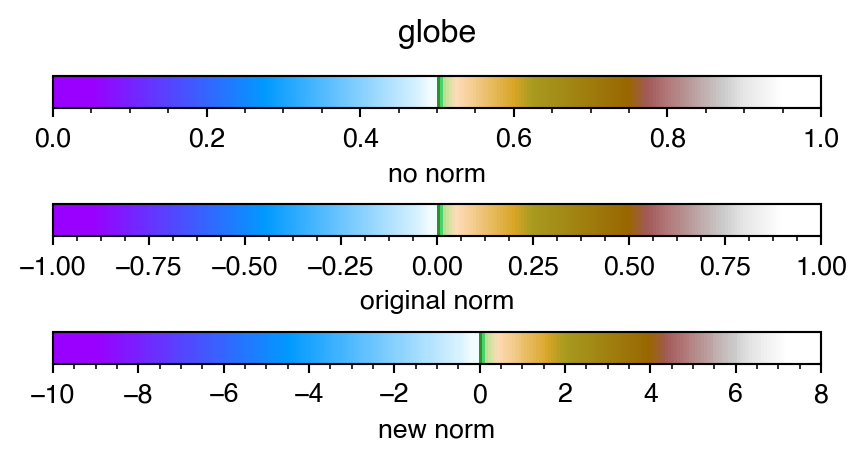

In [2]:
cptfile = 'globe.cpt'
cmap = readcpt(cptfile)
print(cmap.name, cmap.__class__)
cmap.preview(-10, 8)

In the above example, the `globe.cpt` cpt file bundled with GMT is normalized between -1 and 1 with a hinge at 0:

    # header info...
    ...
    -1	153/0/255	-0.95	153/0/255
    ...
    -0.02	241/252/255	0	241/252/255
    0	51/102/0	0.01	51/204/102
    ...
    0.95	white	1	white


The `preview` method of the `DynamicColormap` class shows three representations of the colormap. The top colorbar shows how matplotlib would treat this colormap with out any knowledge of its dynamic properties. Matplotlib colormaps are normalized between 0 and 1 so the hinge value, which is in the middle of the original range, is naturally mapped to 0.5. The colorbar in the middle, shows the original normalization of the colormap and the bottom colorbar shows how this colormap would look like if scaled between `vmin=-10` and `vmax=8`. Each of the domains is scaled separately, keeping the hinge at 0 (the original hinge value).

## Non GMT style cpt files

There are many more sources for cpt files. [cpt-city](http://soliton.vm.bytemark.co.uk/pub/cpt-city/) provides a collection of cpt files for various different applications including ones that are designed for bathymetry and topography, like `mby.cpt`. This cpt file is not normalized, not symmetric around the color discontinuity and does not contain information about the hinge value in the header:

    # header info...
    ...
    -8000   0   0	80      -6000   0   30  100
    ...
    -10	176 226	255	0	0   97	71
    0       0   97	71      50	16  123	48
    ...
    4000	206 206 206	5000	255 255	255
    
Without proper normalization and scaling, this colormap is difficult to manipulate with regard to the color discontinuity. As there is no hinge information in the header, setting `hinge=None` results in a `LinearSegmentedColormap` with the color discontinuity somewhere around 0.61:

mby <class 'matplotlib.colors.LinearSegmentedColormap'>


Text(0.5, 0, 'no norm information')

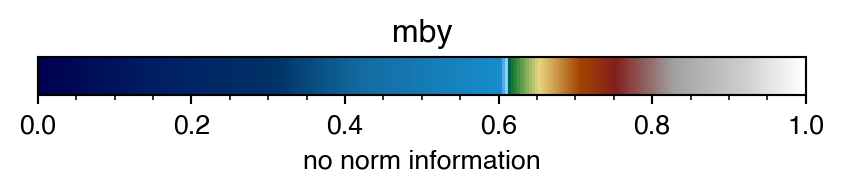

In [3]:
from matplotlib.colorbar import ColorbarBase
cptfile = 'mby.cpt'
cmap = readcpt(cptfile, hinge=None)
print(cmap.name, cmap.__class__)

fig, ax = plt.subplots(1, figsize=(4, 0.2))
fig.subplots_adjust(0, 0, 1, 1, hspace=3)
fig.suptitle(cmap.name, y=2)

ColorbarBase(ax, cmap, orientation='horizontal')
ax.set_xlabel('no norm information')

`readcpt` by default assumes `hinge=0` so if the values in a cpt file range from negative to positive values, color segments are parsed and scaled to account for the hinge value even if the range is not symmetric around it:

mby <class 'cmaptools.DynamicColormap'>


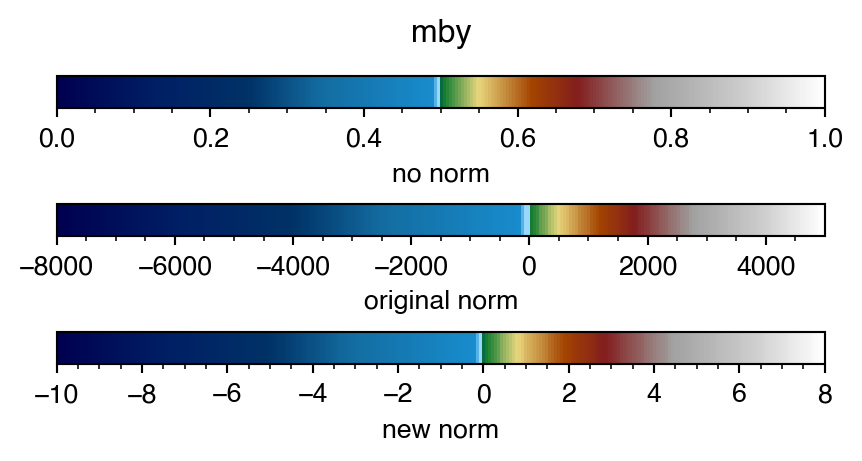

In [4]:
cptfile = 'mby.cpt'
cmap = readcpt(cptfile)
print(cmap.name, cmap.__class__)
cmap.preview(-10, 8)

As before, the top colorbar shows the matplotlib version of the scaled colormap so that the hinge, eventhough not in the middle of the range in the original cpt file, is mapped to 0.5. Middle colorbar shows the colormap with its original norm and the bottom colorbar is shows how this colormap would look like if scaled between vmin=-10 and vmax=8

## Joining two colormaps
It is also possible to join two colormaps together:

seafloor <class 'matplotlib.colors.LinearSegmentedColormap'>
dem2 <class 'matplotlib.colors.LinearSegmentedColormap'>
seafloor->dem2 <class 'cmaptools.DynamicColormap'>


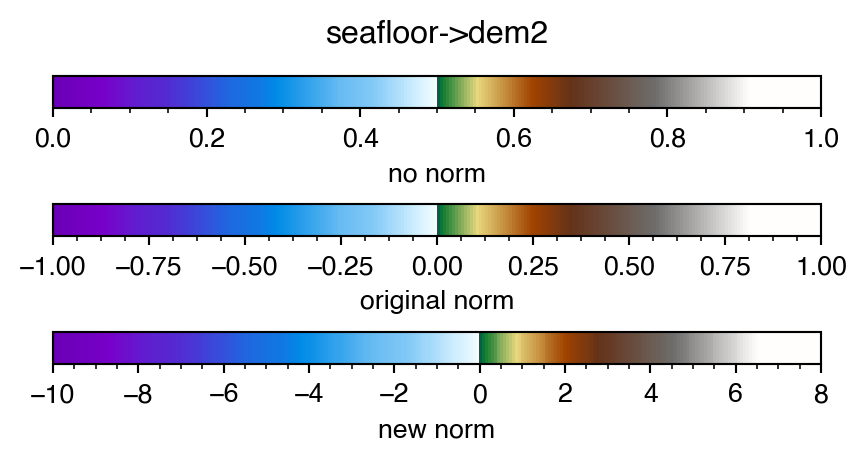

In [5]:
cptfile1 = 'seafloor.cpt'
cmap1 = readcpt(cptfile1)
print(cmap1.name, cmap1.__class__)
cptfile2 = 'dem2.cpt'
cmap2 = readcpt(cptfile2)
print(cmap2.name, cmap2.__class__)

cmap = joincmap(cmap1, cmap2)
print(cmap.name, cmap.__class__)
cmap.preview(-10, 8)

Note that `cmap1` and `cmap2` are normal colormap instances of `LinearSegmentedColormap` while the joined colormap is `DynamicColormap`.

This can be done with matplotlib colormaps as well, here scaling between -8 and 5:

Blues_r->pink_r <class 'cmaptools.DynamicColormap'>


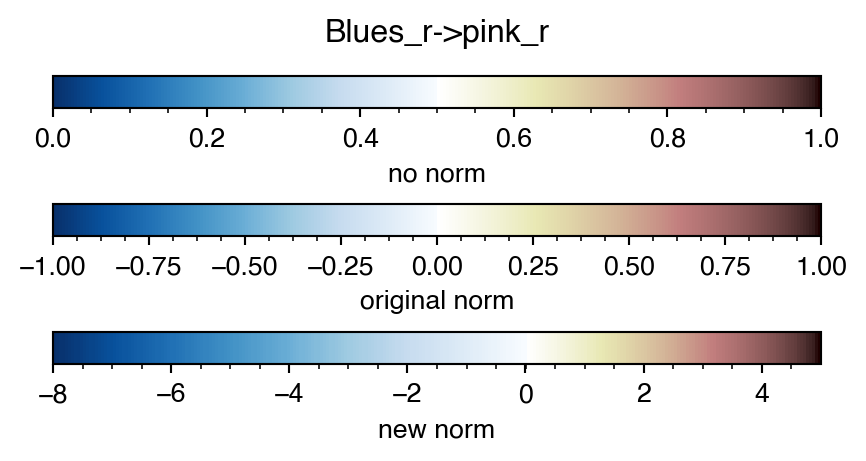

In [6]:
cmap = joincmap('Blues_r', 'pink_r')
print(cmap.name, cmap.__class__)
cmap.preview(-8, 5, 0)

or a matplotlib colormap and a GMT cpt file:

cool_r <class 'matplotlib.colors.LinearSegmentedColormap'>
dem2 <class 'matplotlib.colors.LinearSegmentedColormap'>
cool_r->dem2 <class 'cmaptools.DynamicColormap'>


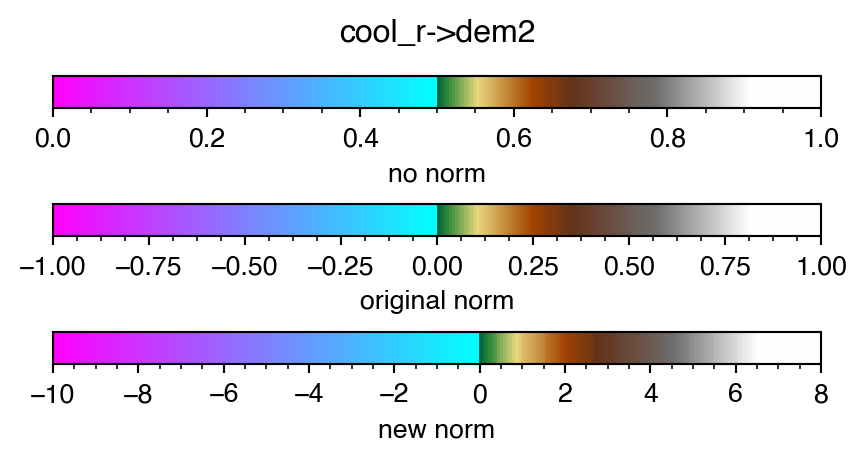

In [7]:
cmap1 = plt.get_cmap('cool_r')
print(cmap1.name, cmap1.__class__)
cptfile2 = 'dem2.cpt'
cmap2 = readcpt(cptfile2)
print(cmap2.name, cmap2.__class__)

cmap = joincmap(cmap1, cmap2)
print(cmap.name, cmap.__class__)
cmap.preview(-10, 8)

Any colormap can be made dynamic:

seismic <class 'matplotlib.colors.LinearSegmentedColormap'>
seismic <class 'cmaptools.DynamicColormap'>


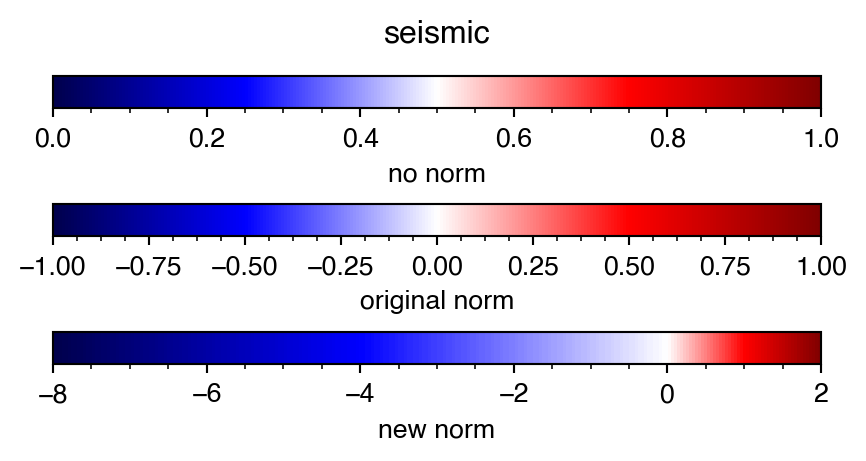

In [8]:
cmap = plt.get_cmap('seismic')
print(cmap.name, cmap.__class__)
cmap = DynamicColormap(cmap)
print(cmap.name, cmap.__class__)
cmap.preview(-8, 2, 0)

this is handy when the data being plotted is not symmetric around the hinge value.

The hinge value can set to other than 0

jet <class 'matplotlib.colors.LinearSegmentedColormap'>
jet <class 'cmaptools.DynamicColormap'>


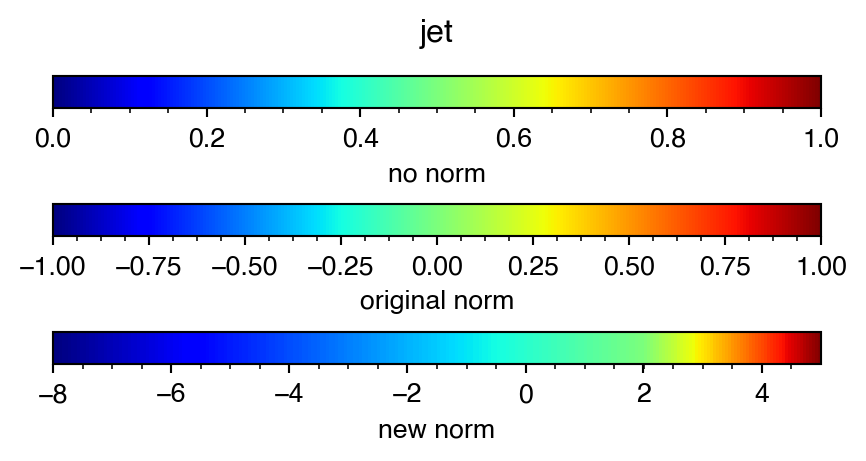

In [9]:
cmap = plt.get_cmap('jet')
print(cmap.name, cmap.__class__)
cmap = DynamicColormap(cmap)
print(cmap.name, cmap.__class__)
cmap.preview(-8, 5, 2)

## Examples with topography and bathymetry

Here I use a subsampled grid of the [GEBCO2019 15 arc-second grid](https://www.gebco.net/data_and_products/gridded_bathymetry_data/).

In [10]:
from xarray import open_dataset
from matplotlib.colors import LightSource

topo = open_dataset('GEBCO_2019_960AS.nc')
print(topo)

ls = LightSource()

<xarray.Dataset>
Dimensions:    (extent: 4, lat: 675, lon: 1350)
Coordinates:
  * lat        (lat) float64 -89.87 -89.6 -89.33 -89.07 ... 89.33 89.6 89.87
  * lon        (lon) float64 -179.9 -179.6 -179.3 -179.1 ... 179.3 179.6 179.9
  * extent     (extent) float64 -180.0 180.0 -90.0 90.0
Data variables:
    elevation  (lat, lon) int16 ...
    crs        |S1 ...
    tlx        float64 ...
    tly        float64 ...
    dx         float64 ...
    dy         float64 ...
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 2.4.1, released 2019/03/15
    history:      Subsampled from 15 to 960 arc-second and forced to INT16 wi...
    title:        The GEBCO_2019 Grid - a continuous terrain model for oceans...
    source:       A subsampled version of the 15 arc-second GEBCO_2019 grid d...


Using the same dynamic colormaps generated above:

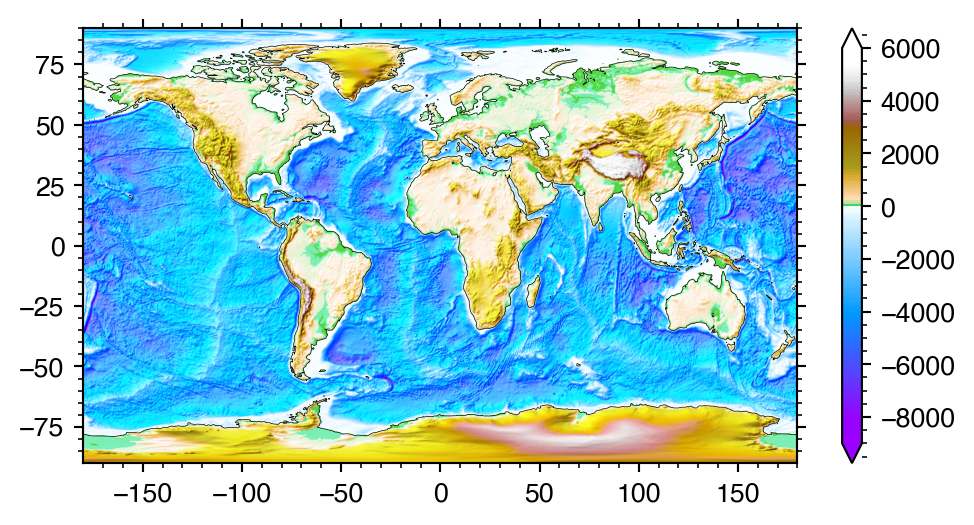

In [11]:
cptfile = 'globe.cpt'
cmap = readcpt(cptfile)
cmap.set_range(-9e3, 6e3)

plt.figure(figsize=(6, 3))
rgb = ls.shade(topo.elevation[::-1].data, cmap, cmap.norm, 'overlay',
               vert_exag=0.01)

plt.imshow(rgb, cmap, cmap.norm,
           extent=topo.extent, aspect='auto', interpolation='bilinear')

plt.colorbar(extend='both')

plt.contour(topo.elevation, levels=[0],
            colors='k', linewidths=0.25,
            extent=topo.extent)

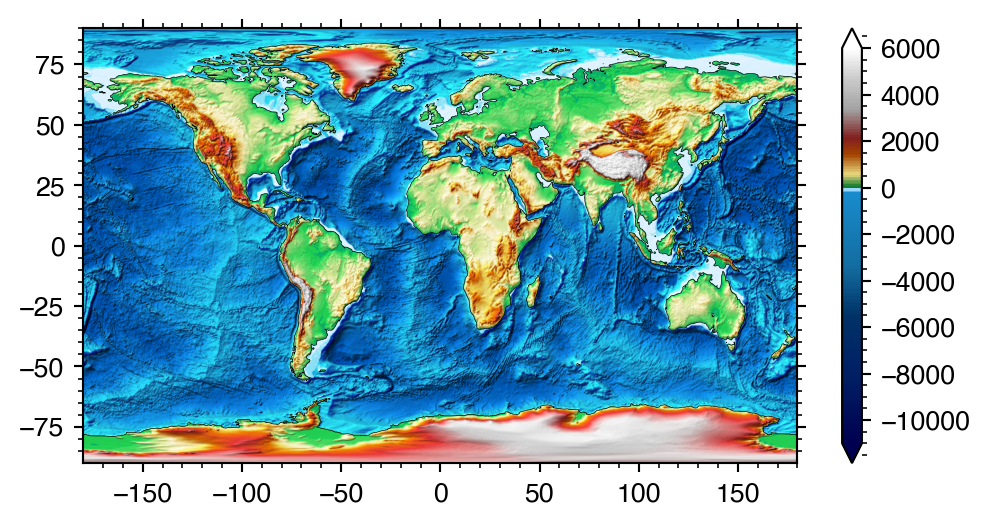

In [12]:
cptfile = 'mby.cpt'
cmap = readcpt(cptfile)
cmap.set_range(-11e3, 6e3)

plt.figure(figsize=(6, 3))
rgb = ls.shade(topo.elevation[::-1].data, cmap, cmap.norm, 'overlay',
               vert_exag=0.01)

plt.imshow(rgb, cmap, cmap.norm,
           extent=topo.extent, aspect='auto', interpolation='bilinear')

plt.colorbar(extend='both')

plt.contour(topo.elevation, levels=[0],
            colors='k', linewidths=0.25,
            extent=topo.extent)

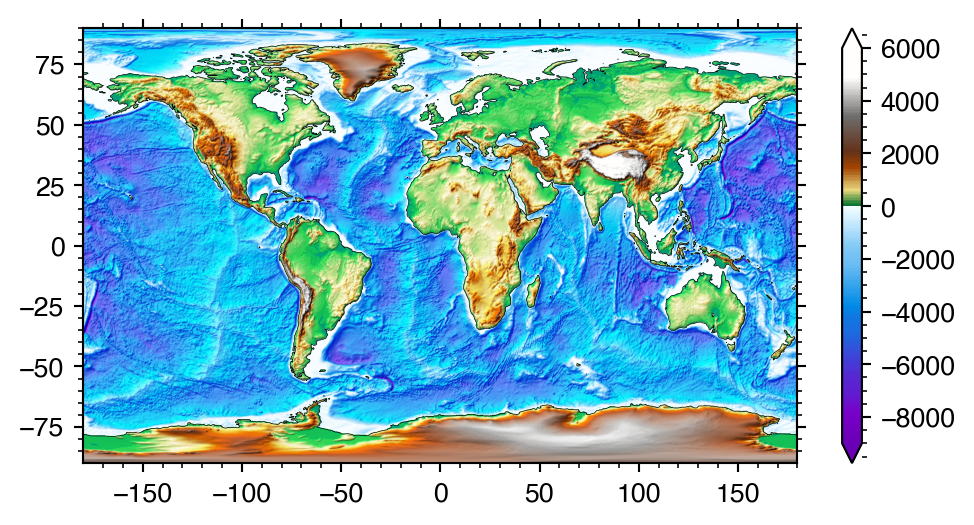

In [13]:
cptfile1 = 'seafloor.cpt'
cmap1 = readcpt(cptfile1)
cptfile2 = 'dem2.cpt'
cmap2 = readcpt(cptfile2)

cmap = joincmap(cmap1, cmap2)
cmap.set_range(-9e3, 6e3)

plt.figure(figsize=(6, 3))
rgb = ls.shade(topo.elevation[::-1].data, cmap, cmap.norm, 'overlay',
               vert_exag=0.01)

plt.imshow(rgb, cmap, cmap.norm,
           extent=topo.extent, aspect='auto', interpolation='bilinear')

plt.colorbar(extend='both')

plt.contour(topo.elevation, levels=[0],
            colors='k', linewidths=0.25,
            extent=topo.extent)

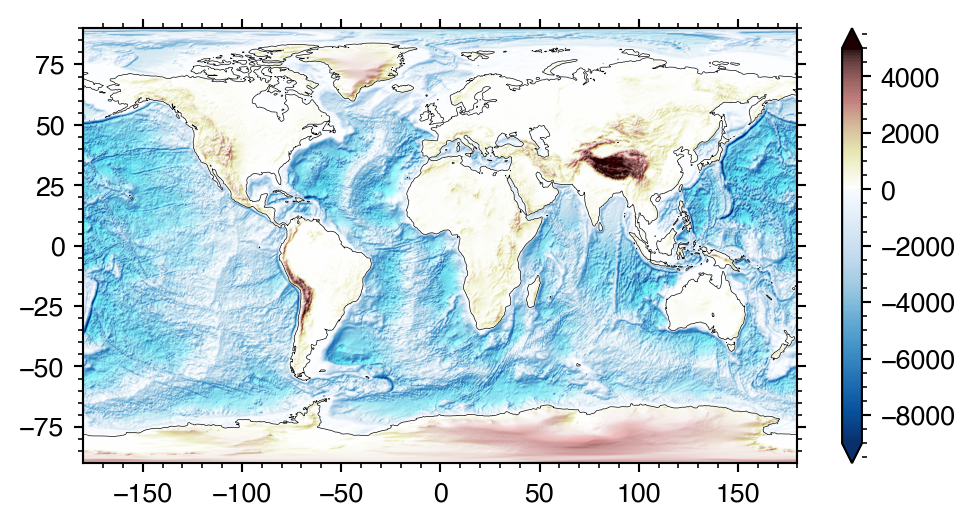

In [14]:
cmap = joincmap('Blues_r', 'pink_r')
cmap.set_range(-9e3, 5e3)

plt.figure(figsize=(6, 3))
rgb = ls.shade(topo.elevation[::-1].data, cmap, cmap.norm, 'overlay',
               vert_exag=0.01)

plt.imshow(rgb, cmap, cmap.norm,
           extent=topo.extent, aspect='auto', interpolation='bilinear')

plt.colorbar(extend='both')

plt.contour(topo.elevation, levels=[0],
            colors='k', linewidths=0.25,
            extent=topo.extent)

## Examples with data

make the data:

In [15]:
import numpy as np
from scipy.stats import multivariate_normal

delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
extent = [-3, 3] * 2
xx, yy = np.meshgrid(x, y)

z1 = multivariate_normal([0, 0], [1, 1]).pdf(np.dstack((xx, yy)))
z2 = multivariate_normal([1, 1], [2, 0.25]).pdf(np.dstack((xx, yy)))
z = z2 - 2 * z1
z /= z.max()

plot without normalization:

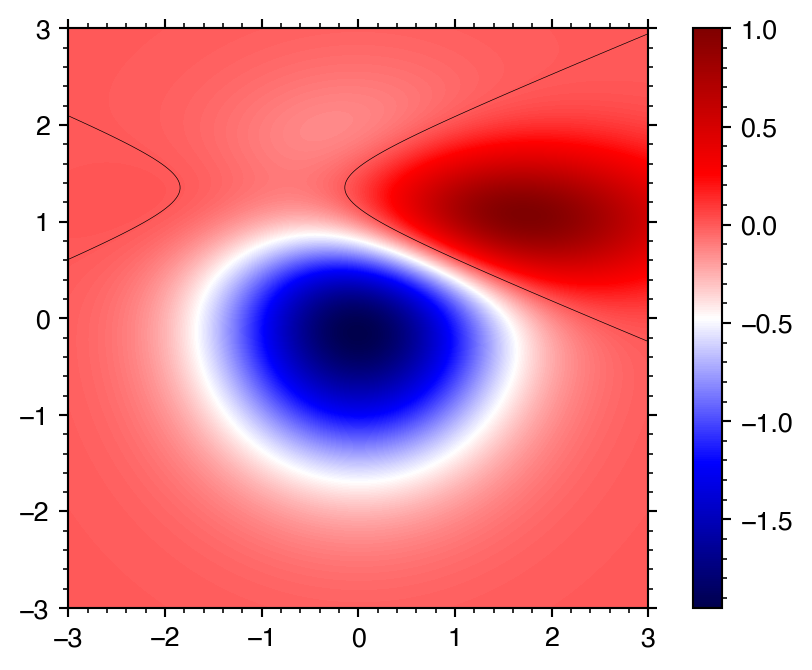

In [16]:
plt.imshow(z[::-1], 'seismic',
           aspect=1, interpolation='bilinear', extent=extent)
plt.colorbar()

plt.contour(z, levels=[0],
            colors='k', linewidths=0.25,
            extent=extent)

Note how the colormap diverges from white but because the min/max of the data is not symmetric around 0, white is not at the center.

One way of handling this is to set `vmin` and `vmax` to the `-` and `+` of the `abs(z).max()`:

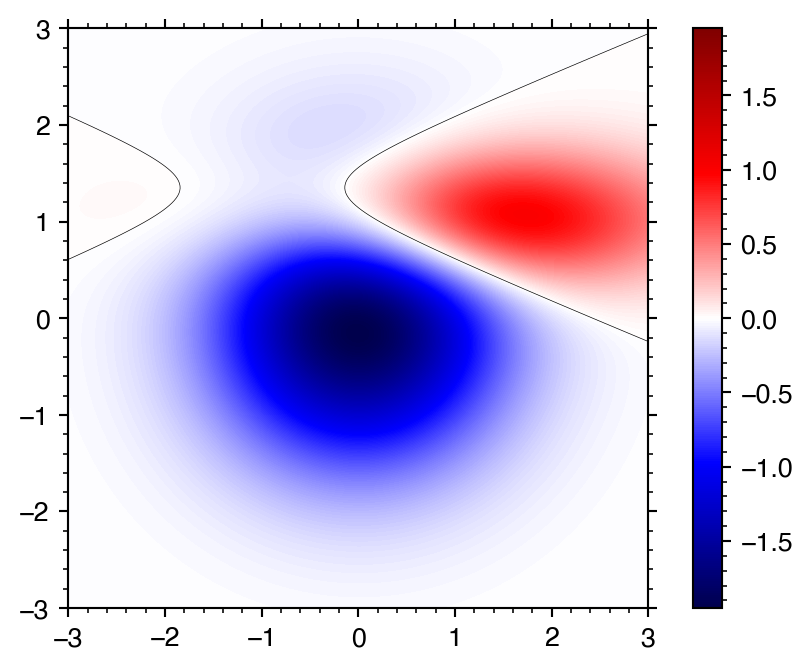

In [17]:
plt.imshow(z[::-1], 'seismic',
           aspect=1, interpolation='bilinear', extent=extent,
           vmin=-np.abs(z).max(), vmax=np.abs(z).max())
plt.colorbar()

plt.contour(z, levels=[0],
            colors='k', linewidths=0.25,
            extent=extent)

However, the positive part of the data is now pale as some dynamic range is lost.

Making the `seismic` colormap dynamic, it is now possible to set the range to the `min` and `max` of the data:

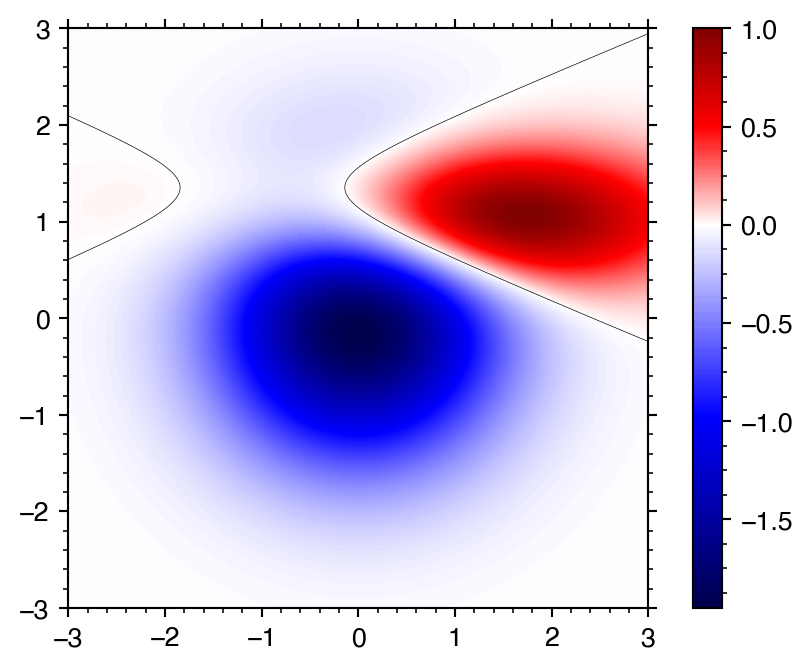

In [18]:
cmap = plt.get_cmap('seismic')
cmap = DynamicColormap(cmap)

cmap.set_range(z.min(), z.max())

plt.imshow(z[::-1], cmap, cmap.norm,
           aspect=1, interpolation='bilinear', extent=extent)
plt.colorbar()

plt.contour(z, levels=[0],
            colors='k', linewidths=0.25,
            extent=extent)